#This notebook analyses the tip percentage in different neighborhoods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###read the DataFrame of TripFareNeighborhood

In [2]:
header_row = ['key','store_and_fwd_flag','dropoff_datetime','passenger_count','trip_time_in_secs', 'trip_distance',
'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','payment_type',
'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount','neighborhood']

In [3]:
#file path might be different
df = pd.read_csv('./data/trip_fare_neighbor_12.csv', names=header_row)

In [4]:
#file path might be diffrent
borough = pd.read_csv('./data/borough12.txt', names=['borough'])

###Append borough

In [5]:
df = df.join(borough)

In [6]:
df

,key,store_and_fwd_flag,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,neighborhood,borough
0,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 10:02:13,1,111,0.50,-73.976433,40.788673,-73.981049,40.782139,NOC,4.0,0,0.5,0.10,0.20,4.50,Upper West Side,New York City-Manhattan
1,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 10:25:21,1,1281,6.10,-73.982101,40.778961,-73.959427,40.720493,CSH,21.0,0,0.5,0.00,0.00,21.50,UNKNOWN,UNKNOWN
2,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 10:46:59,1,925,6.10,-73.959625,40.711407,-73.898460,40.758705,CRD,20.0,0,0.5,1.00,0.00,21.50,Upper East Side,New York City-Manhattan
3,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 11:14:00,1,366,0.70,-73.966888,40.760185,-73.974777,40.752953,CSH,6.0,0,0.5,0.00,0.00,6.50,East Village,New York City-Manhattan
4,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 11:31:04,1,491,2.30,-73.975929,40.733238,-73.966896,40.761131,CSH,9.5,0,0.5,0.00,0.00,10.00,Greenwich Village,New York City-Manhattan
5,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 11:47:46,1,337,0.90,-73.979164,40.756058,-73.975975,40.758190,NOC,5.5,0,0.5,0.00,0.00,6.00,Midtown,New York City-Manhattan
6,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 11:59:38,1,507,1.20,-73.974602,40.761044,-73.988060,40.749001,CRD,7.5,0,0.5,1.60,0.00,9.60,Midtown,New York City-Manhattan
7,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,Y,2013-12-01 12:13:00,1,645,0.60,-73.988998,40.749012,-73.990044,40.757610,CRD,8.0,0,0.5,2.55,0.00,11.05,UNKNOWN,UNKNOWN
8,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 13:00:08,1,758,1.00,-73.991348,40.751602,-73.975914,40.747910,CRD,9.0,0,0.5,1.90,0.00,11.40,Upper West Side,New York City-Manhattan
9,00005007A9F30E289E760362F69E4EAD 11DD39E40329C...,N,2013-12-01 13:10:21,1,275,0.90,-73.977791,40.742115,-73.989799,40.736931,CSH,5.5,0,0.5,0.00,0.00,6.00,UNKNOWN,UNKNOWN


In [7]:
df.to_csv('trip_fare_neighbor_borough_12.csv', index=False)

###Add the column of tip_percentage

In [7]:
df['tip_percentage'] = df['tip_amount']/df['total_amount']

###Sort tip percentage mean according to neighborhood

In [8]:
group_neighborhood = df.groupby('neighborhood')

In [9]:
tip_percent_mean = group_neighborhood.mean().sort('tip_percentage', ascending=False)['tip_percentage']

In [10]:
tip_percent_mean

neighborhood
The Rockaways              0.103475
Woodlawn-Nordwood          0.094396
Douglastown-Little Neck    0.090401
Country Club               0.088886
Saintalbans                0.088357
Bensonhurst                0.087722
Queensboro Hill            0.087268
Kings Bridge               0.086907
Throggs Neck               0.086625
South Bronx                0.086497
Brownsville                0.086381
City Island                0.085788
Bedford Park               0.084881
Springfield Gardens        0.084753
Nkew Gardens               0.083942
...
Corona                      0.075260
East Brooklyn               0.074822
Union Port                  0.074356
Wakefield-Williamsbridge    0.074234
Tremont                     0.074144
Dyker Heights               0.073564
Morris Heights              0.072907
Parkchester                 0.072444
Baychester                  0.072363
Fordham                     0.072299
Riverdale                   0.071700
Flatbush                    0.069554

###Sort tip percentage median according to neighborhoods

In [12]:
tip_percent_median = group_neighborhood.median().sort('tip_percentage', ascending=False)['tip_percentage']

In [13]:
tip_percent_median

neighborhood
The Rockaways              0.143590
Woodlawn-Nordwood          0.133333
Country Club               0.112395
Douglastown-Little Neck    0.111111
Saintalbans                0.107143
City Island                0.105263
South Bronx                0.095238
Bensonhurst                0.093750
Nkew Gardens               0.086957
Springfield Gardens        0.086957
Maspeth                    0.085106
Queensboro Hill            0.084985
Ridgewood                  0.084746
University Heights         0.084220
Throggs Neck               0.083333
...
Middle Village    0
Clearview         0
Tremont           0
Corona            0
Dyker Heights     0
East Brooklyn     0
Flatbush          0
Fordham           0
Riverdale         0
Inwood            0
Parkchester       0
Laurelton         0
Morris Park       0
Morris Heights    0
Steinway          0
Name: tip_percentage, Length: 98, dtype: float64

###*can see a lot of zero tips, suspect many of them pay cash thus no tips*

In [14]:
sum((df['payment_type']=='CSH') == (df['tip_amount']==0))*1.0/len(df)

0.97887534841520918

###*so most of the cash payment don't give tips, we analyze again excluding the cash peyment*

In [15]:
#without cash payment
df_wo_cash = df[df['payment_type']!='CSH']

In [16]:
group_neighborhood_wo_cash = df_wo_cash.groupby('neighborhood')

In [17]:
#get mean and median
tip_mean_wo_cash = group_neighborhood_wo_cash.mean().sort('tip_percentage', ascending=False)['tip_percentage']
tip_median_wo_cash = group_neighborhood_wo_cash.median().sort('tip_percentage', ascending=False)['tip_percentage']

In [18]:
tip_mean_wo_cash

neighborhood
The Rockaways              0.174274
Woodlawn-Nordwood          0.162832
Clearview                  0.160237
Kings Bridge               0.159426
Saintalbans                0.159042
Brownsville                0.157869
Douglastown-Little Neck    0.157791
Bedford Park               0.157544
Woodhaven-Richmond Hill    0.155980
Auburndale                 0.155053
Throggs Neck               0.154565
Dyker Heights              0.154485
City Island                0.154419
Utopia                     0.153482
Middle Village             0.153466
...
Ridgewood          0.148728
Flushing           0.148517
Sunset Park        0.148468
Bay Ridge          0.147922
Corona             0.147725
Laurelton          0.147483
Parkchester        0.147424
Steinway           0.146804
Country Club       0.146662
Queens Village     0.143969
Morris Park        0.143949
Hunts Point        0.141682
Williams Bridge    0.141134
Tremont            0.140424
Flatbush           0.132153
Name: tip_percentage, L

In [23]:
tip_median_wo_cash

neighborhood
Kings Bridge               0.166667
Saintalbans                0.166667
The Rockaways              0.166667
Throggs Neck               0.165512
University Heights         0.165512
Queensboro Hill            0.165474
Baychester                 0.165245
Morris Heights             0.164811
Auburndale                 0.164638
Woodlawn-Nordwood          0.163961
Woodhaven-Richmond Hill    0.163793
Greenwood                  0.163732
Douglastown-Little Neck    0.163374
Bedford Park               0.163263
Tremont                    0.163232
...
Bay Ridge          0.161491
Jamaica            0.161491
High Bridge        0.161491
Bensonhurst        0.161074
Hunts Point        0.161074
Union Port         0.161074
Fordham            0.160839
Parkchester        0.160584
East Brooklyn      0.160000
Williams Bridge    0.159985
Dyker Heights      0.159745
Queens Village     0.157895
City Island        0.155844
Morris Park        0.155804
Steinway           0.153846
Name: tip_percentage, L

In [27]:
neighbor_high_set = ['The Rockaways','Woodlawn-Nordwood','Douglastown-Little Neck','Country Club','Saintalbans']

In [28]:
neighbor_low_set = ['Riverdale','Flatbush','Morris Park','Clearview','Steinway']

In [95]:
t1 = tip_percent_mean[tip_percent_mean.index.isin(neighbor_high_set)]

In [96]:
t1

neighborhood
The Rockaways              0.103475
Woodlawn-Nordwood          0.094396
Douglastown-Little Neck    0.090401
Country Club               0.088886
Saintalbans                0.088357
Name: tip_percentage, dtype: float64

In [85]:
t2 = tip_percent_mean[tip_percent_mean.index.isin(neighbor_low_set)]

In [86]:
t2

neighborhood
Riverdale       0.071700
Flatbush        0.069554
Morris Park     0.066075
Clearview       0.065551
Steinway        0.062916
Name: tip_percentage, dtype: float64

In [87]:
t3 = tip_mean_wo_cash[tip_mean_wo_cash.index.isin(neighbor_high_set)]

In [88]:
t3

neighborhood
The Rockaways              0.174274
Woodlawn-Nordwood          0.162832
Saintalbans                0.159042
Douglastown-Little Neck    0.157791
Country Club               0.146662
Name: tip_percentage, dtype: float64

In [89]:
t4 = tip_mean_wo_cash[tip_mean_wo_cash.index.isin(neighbor_low_set)]

In [99]:
t4

neighborhood
Clearview       0.160237
Riverdale       0.148915
Steinway        0.146804
Morris Park     0.143949
Flatbush        0.132153
Name: tip_percentage, dtype: float64

###compare some neighborhood by whether using cash payment

In [107]:
t13 = pd.concat([t1,t3], axis=1)

In [108]:
t13.columns = [['tip_percent' ,'tip_percent_wo_cash']]

In [109]:
t13

,tip_percent,tip_percent_wo_cash
Country Club,0.088886,0.146662
Douglastown-Little Neck,0.090401,0.157791
Saintalbans,0.088357,0.159042
The Rockaways,0.103475,0.174274
Woodlawn-Nordwood,0.094396,0.162832


In [110]:
t24 = pd.concat([t2, t4], axis=1)

In [111]:
t24.columns = [['tip_percent','tip_percent_wo_cash']]

In [114]:
t24

,tip_percent,tip_percent_wo_cash
Clearview,0.065551,0.160237
Flatbush,0.069554,0.132153
Morris Park,0.066075,0.143949
Riverdale,0.071700,0.148915
Steinway,0.062916,0.146804


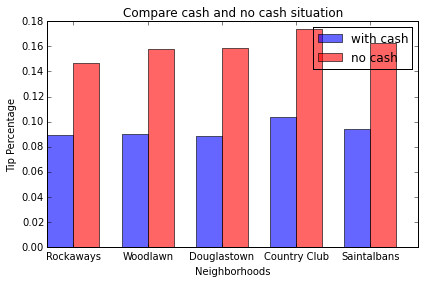

In [142]:
fig, ax = plt.subplots()

index = np.array([0.0,1.0,2.0,3.0,4.0])
bar_width = 0.35

opacity = 0.6

plot1 = plt.bar(index, t13['tip_percent'], bar_width, alpha=opacity, color='b', label='with cash')

plot2 = plt.bar(index + bar_width, t13['tip_percent_wo_cash'], bar_width, alpha=opacity, color='r', label='no cash')

plt.xlabel('Neighborhoods')
plt.ylabel('Tip Percentage')
plt.title('Compare cash and no cash situation')
plt.xticks(index + bar_width, ('Rockaways','Woodlawn','Douglastown','Country Club','Saintalbans'))
plt.legend()

plt.tight_layout()
plt.show()

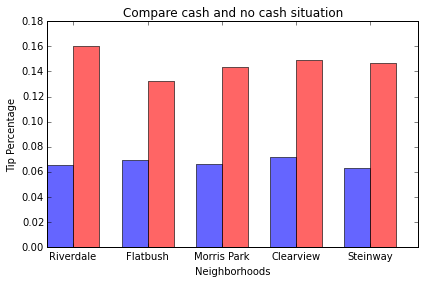

In [138]:
fig, ax = plt.subplots()

index = np.array([0.0,1.0,2.0,3.0,4.0])
bar_width = 0.35

opacity = 0.6

plot1 = plt.bar(index, t24['tip_percent'], bar_width, alpha=opacity, color='b')

plot2 = plt.bar(index + bar_width, t24['tip_percent_wo_cash'], bar_width, alpha=opacity, color='r')

plt.xlabel('Neighborhoods')
plt.ylabel('Tip Percentage')
plt.title('Compare cash and no cash situation')
plt.xticks(index + bar_width, ('Riverdale','Flatbush','Morris Park','Clearview','Steinway'))
plt.legend()

plt.tight_layout()
plt.show()

##sort the revenue by neighborhood

In [31]:
group_revenue_mean = group_neighborhood.mean().sort('total_amount', ascending=False)['total_amount']

In [32]:
group_revenue_mean

neighborhood
Clearview                   17.817727
Queensboro Hill             17.757078
Country Club                17.286212
Laurelton                   17.278382
Morris Heights              16.800625
Williams Bridge             16.776642
Baychester                  16.087143
Hunts Point                 16.086972
Auburndale                  16.043143
Saintalbans                 16.030794
Riverdale                   15.916728
Queens Village              15.834324
Gravesend-Sheepshead Bay    15.770107
Springfield Gardens         15.640188
Bensonhurst                 15.594235
...
Middle Village              14.640000
Jamaica                     14.604626
Bay Ridge                   14.587289
Wakefield-Williamsbridge    14.518209
Union Port                  14.507177
Morris Park                 14.481230
City Island                 14.400000
University Heights          14.380508
Woodlawn-Nordwood           14.372319
Fordham                     14.295261
Brownsville                 14.17

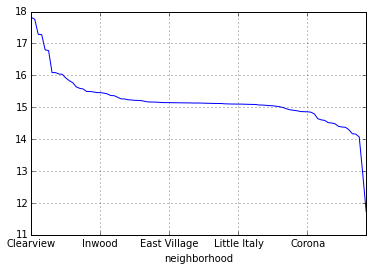

In [33]:
group_revenue_mean.plot()

##now try to group with borough

In [158]:
group_borough = df.groupby('borough')

In [159]:
grouped_borough_mean = group_borough.mean().sort('tip_percentage', ascending=False)['tip_percentage'][1:]

In [160]:
grouped_borough_mean

borough
New York City-Manhattan    0.081470
New York City-Brooklyn     0.081312
New York City-Queens       0.081112
New York City-Bronx        0.080398
Name: tip_percentage, dtype: float64

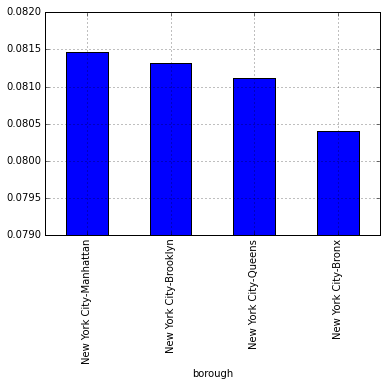

In [168]:
grouped_borough_mean.plot(kind='bar', ylim=[0.079, 0.082])